# Lab 2: Logistic Regression

In this lab we will consider a student scores dataset.

First, import the mllab.py script.

In [10]:
from mllab import *


Packages:
    numpy as np
    matplotlib.pyplot as plt

Functions:
    plotXY
    add_bias
    grad_descent
    MSE
    fmin_bfgs
    plot_frontiere
    time



## Question 1

The _exams.txt_ file contains 3 columns that represent the exam 1, exam 2 scores and the result of 100 students (0: Not admitted, 1: Admitted).
- Open this file with a file editor to understand more the data. 
- Load the data and check its size.  

In [19]:
students_results = np.loadtxt('exams.txt',delimiter='\t')

print(students_results.shape)

(100, 3)


## Question 2
* Extract exam 1 and exam 2 scores in a $(n,2)$-array and the labels (results) in a $(n,)$-array.
* Plot exam 1 against exam 2 with different color for each class of results.
 * **Hint:** Look at the function $\verb!plotXY!$.
* Add a bias term and check data dimension.

(100, 3) (100, 1)


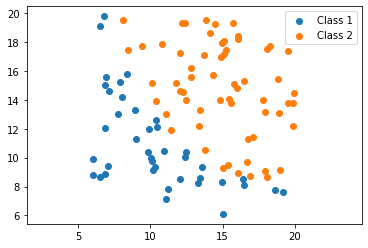

In [20]:
X = students_results[:,0:2]
y = students_results[:,2]

plotXY(X, y)
X = add_bias(X)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

## Question 3
Implement the sigmoid function $$\sigma(z) = \left[ 1 + e^{-z} \right]^{-1}$$.

In [4]:
def sigmoid(z):
    return np.ones(z.shape)/(1+np.exp(-z))

## Question 4
Implement the MSE loss function associated and its gradient.

In [5]:
def dMSE(y_true, y_pred):
    return np.dot(X.T, y_pred-y_true)/X.shape[0]

MSE_loss = (lambda w : MSE(y, sigmoid(np.dot(X, beta))))
dMSE_loss = (lambda w : dMSE(y, sigmoid(np.dot(X, beta))))

## Question 5
Find the best learning rate.

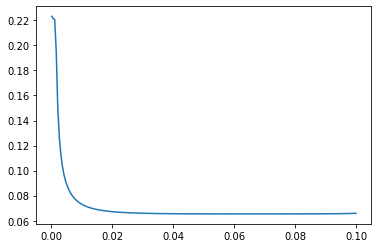

In [6]:
Alpha = np.linspace(0.0001,0.1, 200)
Loss = list()
for alpha in Alpha:
    beta_hat = grad_descent(dMSE_loss, beta0=[0]*3, alpha=alpha, max_iter=1e5)
    Loss.append(MSE_loss(b_hat))
plt.plot(Alpha, Loss)
plt.show()

## Question 6
Find the optimal weight parameter $w^*$ with the gradient descent algorithm. Print the computation time.

In [12]:
start = time()
beta_hat = grad_descent(dMSE_loss, beta0=[0]*3, alpha=0.02, verbose=True, max_iter=1e5)
print('Took {} seconds'.format(time() - start))

Converged in 54006 steps with precision 9.999879959347105e-05
The optimal parameter is:  [-15.79628158   0.65725478   0.62857813]
Took 1.6042988300323486 seconds


## Question 7
Plot the line separating the two classes.

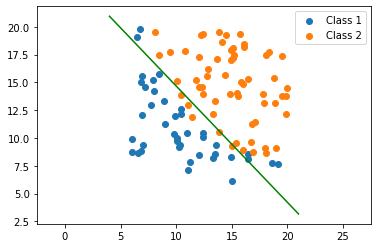

In [8]:
plotXY(students_results[:,0:2],students_results[:,2])

a = -beta_hat[1]/beta_hat[2]
b = -beta_hat[0]/beta_hat[2]
x1, x2 = 4, 21

plt.plot([x1, x2], [x1*a+b, x2*a+b], color='green')

## Question 8
Implement the the log loss function: $$L(w)=\frac{1}{n}\sum_{i=1}^{n} \log \left[ 1 + e^{ -y_i (x_i \cdot w) } \right]$$ and its gradient.

In [9]:
def log_loss(beta):
    return -np.log(sigmoid((2*y-1)*np.dot(X,beta))).mean()

def dlog_loss(beta):
    return np.dot(X.T, sigmoid(np.dot(X,beta)) - y)/X.shape[0] 

## Question 9
Find the best learning rate.

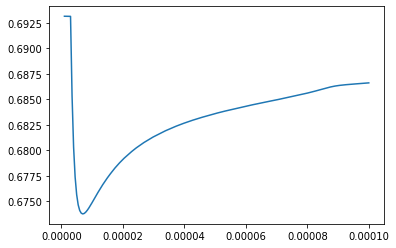

In [10]:
Alpha = np.linspace(1e-6, 1e-4, 200)
Loss = list()
for alpha in Alpha:
    beta_hat = grad_descent(dlog_loss, beta0=[0]*3, alpha=alpha, tol=1e-5, max_iter=1e4)
    Loss.append(log_loss(beta_hat))
plt.plot(Alpha, Loss)
plt.show()

## Question 10
Use gradient descent to find the optimal parameter. Print the computation time.

In [13]:
start = time()
beta_hat = grad_descent(dlog_loss, beta0=[0]*3, alpha=7e-5, verbose=True, max_iter=1e6, tol=1e-7)
print('Took {} seconds'.format(time() - start))

Converged in 1000000 steps with precision 2.8172676388179706e-06
The optimal parameter is:  [-3.70444763  0.18494176  0.14740314]
Took 29.73663902282715 seconds


## Question 11
Plot the line separating the two classes.

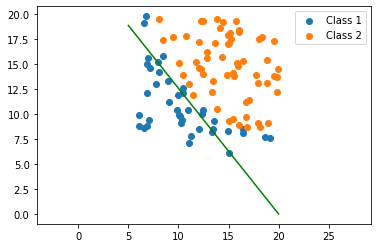

In [14]:
plotXY(X[:,1:],y.T[0])

a = -beta_hat[1]/beta_hat[2]
b = -beta_hat[0]/beta_hat[2]
x1, x2 = 5, 20

plt.plot([x1, x2], [x1 * a + b, x2 * a + b], color="g")

## Question 12
Use the function $\verb!fmin_bfgs!$ to find $w^*$. Print the computation time. Why is this a better solver ?

In [15]:
start_time = time()
beta_hat = fmin_bfgs(lambda beta : log_loss(beta.reshape(-1, 1)), np.array([0,0,0]))
print('Took {} seconds'.format(time() - start))

Optimization terminated successfully.
         Current function value: 0.203398
         Iterations: 18
         Function evaluations: 120
         Gradient evaluations: 24
Took 29.968935012817383 seconds


## Question 13
Plot the line separating the two classes.

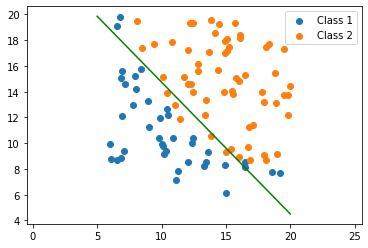

In [16]:
plotXY(X[:,1:],y.T[0])

a = -beta_hat[1]/beta_hat[2]
b = -beta_hat[0]/beta_hat[2]
x1, x2 = 5, 20

plt.plot([x1, x2], [x1 * a + b, x2 * a + b], color="g")

## Question 14
Use $\verb!sklearn!$'s [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Plot the data as in Question 2. Plot the frontere line using the $\verb!plot_frontiere!$ function.

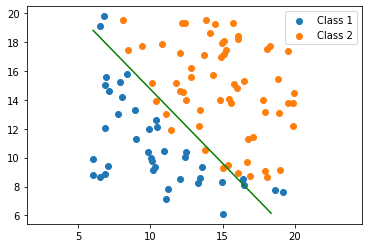

In [18]:
from sklearn.linear_model import LogisticRegression as LR

X = students_results[:,0:2]
y = students_results[:,2]

clf = LR().fit(X,y)
plotXY(X, y)
plot_frontiere(clf, X)